
## Exercice:

Sans utiliser de boucles :

  - Créer une matrice (5x6) aléatoire
  - Remplacer une colonne sur deux (en partant de la première) par sa valeur moins le double de la colonne suivante
  - Remplacer les valeurs négatives par 0 en utilisant un masque binaire
  - Calculer l'approximation de $\pi$ avec la formule de Wallis: (sum,prod)
     $$ \pi = 2\prod_{i=1}^{\infty} \frac{4i^2}{4i^2-1}$$ 
  - Examen 2017: approximation de ln(1+x) et visualisation de l'écart (cumsum, cumprod)
      $$ ln(1+x) = \sum_{i=1}^{\infty} \frac{(-1)^{i+1}}{i}x^i$$
  - Examen 2018: approximation Monte Carlo de $\pi$


In [10]:
import numpy as np

In [14]:
a = np.random.normal(size=(5,6))
a

array([[ 0.72032166,  0.28124752, -1.02534892,  0.98565133,  1.11481577,
         0.75965773],
       [-0.70044338,  0.65408673,  1.41427641,  0.20471602, -2.04112148,
        -0.7625032 ],
       [-1.1420227 , -0.85244438, -0.41017898, -0.19727681,  0.44138329,
        -0.04050907],
       [-0.47421217,  0.153669  , -2.14939942,  0.45130714,  1.02065475,
        -0.79608031],
       [-0.36255533,  0.64596022,  0.70982014,  0.37472412,  1.20906468,
        -0.57587325]])

In [15]:
a[a<0] = 0
a

array([[0.72032166, 0.28124752, 0.        , 0.98565133, 1.11481577,
        0.75965773],
       [0.        , 0.65408673, 1.41427641, 0.20471602, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.44138329,
        0.        ],
       [0.        , 0.153669  , 0.        , 0.45130714, 1.02065475,
        0.        ],
       [0.        , 0.64596022, 0.70982014, 0.37472412, 1.20906468,
        0.        ]])

In [19]:
a[:,::2] = a[:,::2] - 2*a[:,1::2]
a[0]

array([-0.96716349,  0.28124752, -5.91390796,  0.98565133, -3.44313061,
        0.75965773])

In [21]:
vraipi = np.pi

In [33]:
def wallis(n):
    i = np.arange(n)+1
    b = (4*i**2)
    return 2*np.cumprod(b/(b-1))

In [46]:
res = vraipi-wallis(1000)
res

array([0.47492599, 0.29714821, 0.21587837, 0.16943846, 0.1394167 ,
       0.11842246, 0.10291902, 0.09100266, 0.08155811, 0.07388885,
       0.06753749, 0.06219131, 0.05762923, 0.05369058, 0.05025576,
       0.04723393, 0.04455483, 0.0421633 , 0.04001539, 0.03807569,
       0.03631533, 0.03471054, 0.03324156, 0.03189186, 0.03064749,
       0.02949656, 0.02842895, 0.02743591, 0.02650991, 0.02564437,
       0.02483356, 0.02407244, 0.02335659, 0.02268209, 0.02204545,
       0.02144357, 0.02087368, 0.02033329, 0.01982018, 0.01933233,
       0.01886791, 0.01842529, 0.01800295, 0.01759954, 0.01721382,
       0.01684464, 0.01649096, 0.01615183, 0.01582636, 0.01551375,
       0.01521326, 0.01492418, 0.01464588, 0.01437777, 0.0141193 ,
       0.01386996, 0.01362928, 0.0133968 , 0.01317212, 0.01295486,
       0.01274464, 0.01254114, 0.01234403, 0.01215303, 0.01196784,
       0.01178822, 0.0116139 , 0.01144467, 0.0112803 , 0.01112058,
       0.01096532, 0.01081434, 0.01066745, 0.01052451, 0.01038

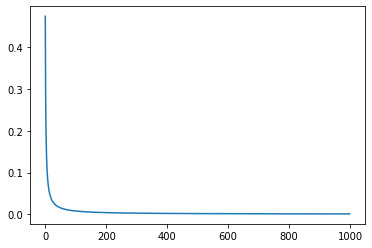

In [50]:
import pylab
pylab.plot(res)

In [64]:
def ln1(x,n):
    i = np.arange(n)+1
    return np.cumsum((-1)**(i+1)/i*x**i)

In [68]:
np.log

<ufunc 'log'>

In [71]:
erreur = ln1(0.5,1000)-log(1.5)

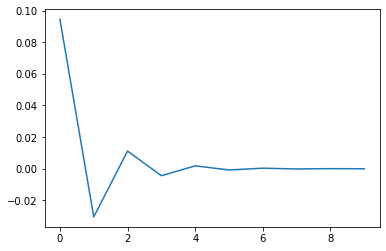

In [75]:
pylab.plot(erreur[:10])

In [2]:
import numpy as np

a = np.random.random((5,6))-0.3
print(a)

[[ 0.50485298 -0.17107857 -0.28123392  0.35814051  0.69610554  0.50489116]
 [ 0.44373168  0.07596192 -0.20399471  0.33903878 -0.19292254  0.58443296]
 [ 0.48532706  0.48003498  0.27984522  0.1055935  -0.28457136  0.07994493]
 [ 0.00612722  0.61169589  0.48739643  0.27762633 -0.02709878  0.2701364 ]
 [ 0.29065567 -0.2938163   0.21355553  0.24834878  0.37500439 -0.12840343]]


In [3]:
a[a<0] = 0

In [4]:
NMAX = 1000000
i = 1+np.arange(NMAX)
b = 4*i**2
terms = (b/(b-1))
monpi = 2*terms.prod()
print(monpi)

from math import pi

3.141591868192149


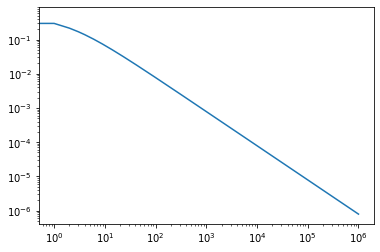

In [8]:
approx = pi-2*terms.cumprod()
import pylab
pylab.plot(approx)
#pylab.loglog(approx)

In [6]:
sum((-1)**i/i*0.5**i)

-0.4054651081081643

In [17]:
a[:,::2] = a[:,::2] + 2*a[:,1::2]
print(a)

[[ 0.63411735  0.16536403  0.80742389  0.1574255   0.35702313  0.19395452]
 [-0.70286642 -0.28842266  0.73098293  0.46961312  0.18839013 -0.17198078]
 [ 1.1061183   0.48610162  0.60592265  0.34178927  0.54333648 -0.0325966 ]
 [ 0.97544705  0.22409427  0.64364054  0.41853895  0.64526916  0.36192776]
 [-0.00272042 -0.20047771  1.02696332  0.47784272  1.83459281  0.67370658]]


In [31]:
a[(a<0)] = 0

array([-0.23301698, -0.13279102, -0.26187959, -0.07231389, -0.06201684,
       -0.14125872, -0.04817814])

In [23]:
print(a)

[[0.63411735 0.16536403 0.80742389 0.1574255  0.35702313 0.19395452]
 [0.         0.         0.73098293 0.46961312 0.18839013 0.        ]
 [1.1061183  0.48610162 0.60592265 0.34178927 0.54333648 0.        ]
 [0.97544705 0.22409427 0.64364054 0.41853895 0.64526916 0.36192776]
 [0.         0.         1.02696332 0.47784272 1.83459281 0.67370658]]


In [4]:
b = np.zeros(a.shape)
b[...] = a
b[b<0] = 0
print(b)

[[0.65064807 0.55031481 0.12193933 0.23659625 0.41359663 0.26513948]
 [0.         0.         0.62183885 0.         0.         0.01971086]
 [0.10584085 0.         0.57611705 0.66397284 0.36930593 0.02355765]
 [0.         0.         0.57341865 0.19488033 0.27488565 0.        ]
 [0.32949501 0.18343629 0.29262966 0.         0.44038484 0.51826797]]


In [5]:
a[:,::2] = a[:,::2] - 2* a[:,1::2]
print(a)

[[-0.44998156  0.55031481 -0.35125317  0.23659625 -0.11668233  0.26513948]
 [-0.0461634  -0.08718648  1.09942519 -0.23879317 -0.31688683  0.01971086]
 [ 0.29096268 -0.09256091 -0.75182862  0.66397284  0.32219063  0.02355765]
 [ 0.01578636 -0.10033475  0.18365799  0.19488033  0.70318363 -0.21414899]
 [-0.03737757  0.18343629  0.46828044 -0.08782539 -0.59615109  0.51826797]]


In [52]:
from math import pi

MAXN = 1000000



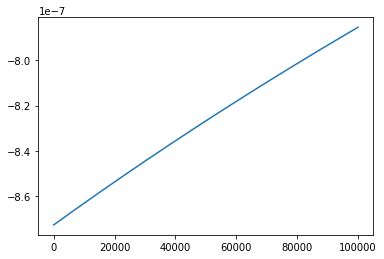

In [60]:
import pylab
pylab.plot(y[-100000:])

In [61]:
#Exam 2017 approximation de ln(1+x) = sum ((-1)**(i+1)/i*x**i)

def ln_approx(x,n=1000):
    i = np.arange(1,n+1)
    v = (-1)**(i+1)/i*(x**i)
    return v.sum()

In [65]:
ln_approx(0.5,n=100)-np.log(1.5)

-5.551115123125783e-17

In [66]:
def error_ln(x,n=1000):
    i = np.arange(1,n+1)
    v = (-1)**(i+1)/i*(x**i)
    return v.cumsum()-np.log(1+x)

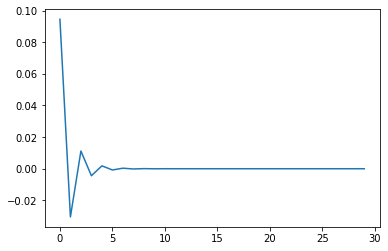

In [73]:
import pylab

pylab.plot(error_ln(0.5,30))

In [76]:
a = np.arange(10)
sum(a>5)

4

In [86]:
# Exam 2018
def montecarlo_pi(n):
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    res = 4*sum(x**2+y**2<=1)/n
    return res

print(montecarlo_pi(10000))

3.1404
